**Log Classification System**





# **Data Load**

In [1]:
import pandas as pd

df = pd.read_csv(r"/content/synthetic_logs.csv")
df

,timestamp,source,log_message,target_label,complexity
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert
...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,bert


In [85]:
df.shape

(2410, 7)

In [2]:
df.columns

Index(['timestamp', 'source', 'log_message', 'target_label', 'complexity'], dtype='object')

In [3]:
df.source.unique()

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI', 'LegacyCRM'], dtype=object)

In [5]:
df.target_label.unique()

array(['HTTP Status', 'Critical Error', 'Security Alert', 'Error',
       'System Notification', 'Resource Usage', 'User Action',
       'Workflow Error', 'Deprecation Warning'], dtype=object)

# **Exploratory Data Analysis**

In [63]:
df.source.value_counts()

,count
source,
ThirdPartyAPI,496
ModernHR,492
BillingSystem,479
AnalyticsEngine,471
ModernCRM,465
LegacyCRM,7


<ipython-input-68-86dc0d2d1052>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df.source.value_counts(),palette='Set2')


<Axes: xlabel='source', ylabel='count'>

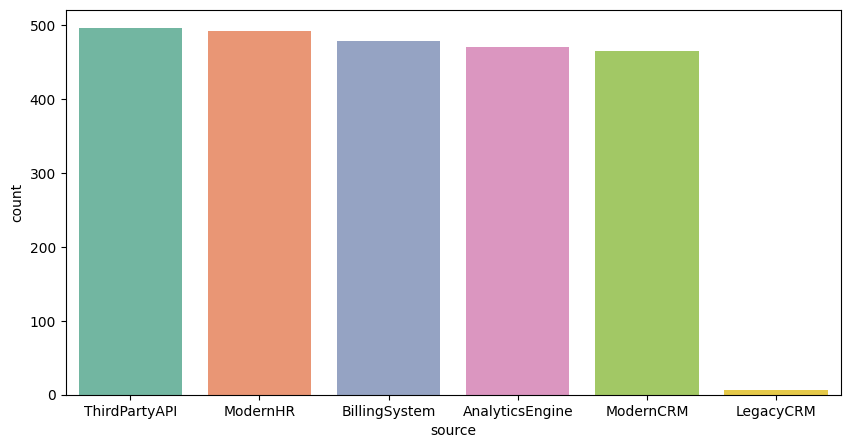

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.barplot(df.source.value_counts(),palette='Set2')

In [7]:
df.target_label.value_counts()

,count
target_label,
HTTP Status,1017
Security Alert,371
System Notification,356
Error,177
Resource Usage,177
Critical Error,161
User Action,144
Workflow Error,4
Deprecation Warning,3


<ipython-input-76-3bd6b8947a69>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df.target_label.value_counts(),palette='Set3')


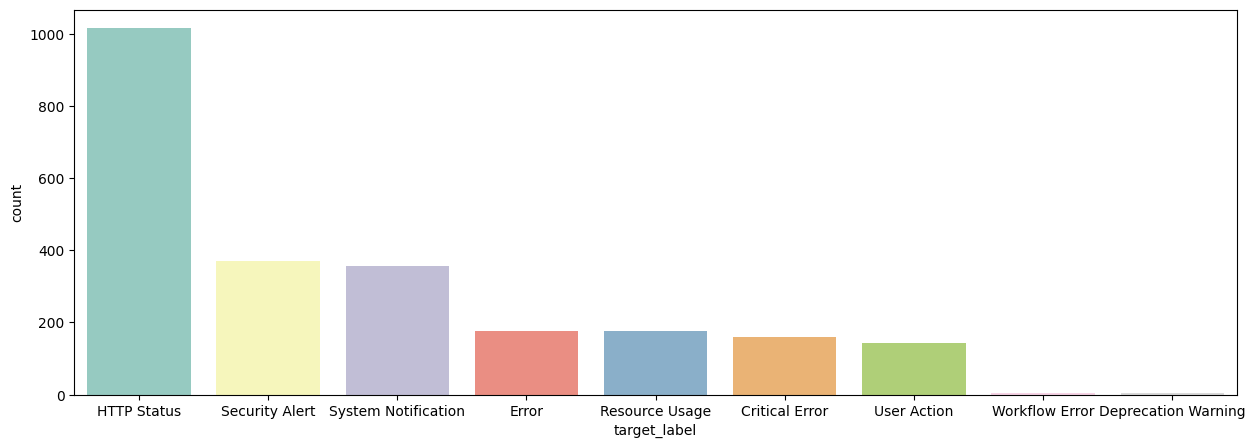

In [76]:
plt.figure(figsize=(15,5))
sns.barplot(df.target_label.value_counts(),palette='Set3')
plt.show()

In [8]:
df.complexity.value_counts()

,count
complexity,
bert,1903
regex,500
llm,7


<ipython-input-80-c891785b1de9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df.complexity.value_counts(),palette='Set2')


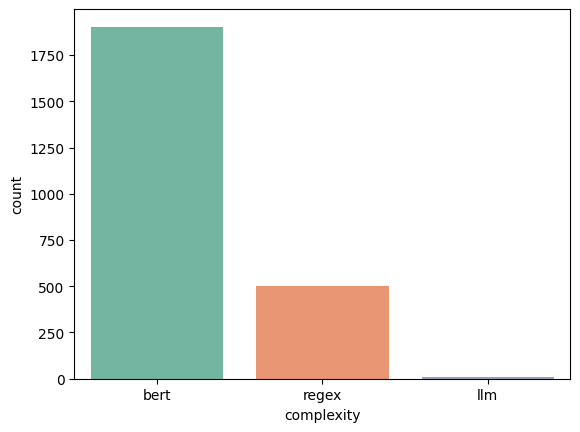

In [80]:
sns.barplot(df.complexity.value_counts(),palette='Set2')
plt.show()

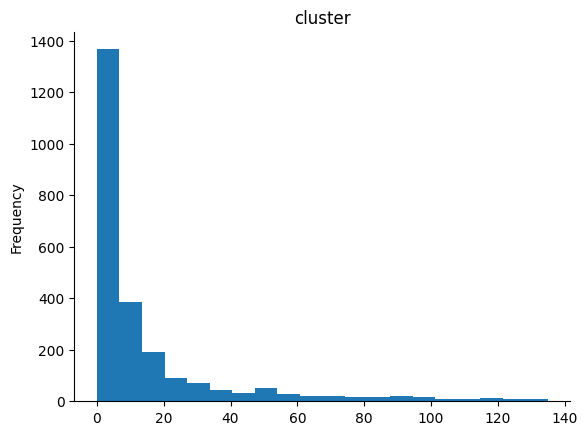

In [87]:
df['cluster'].plot(kind='hist', bins=20, title='cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
df[df.log_message.str.contains("logged out")]

,timestamp,source,log_message,target_label,complexity
27,9/24/2025 19:57,ThirdPartyAPI,User User685 logged out.,User Action,regex
88,3/8/2025 19:04,AnalyticsEngine,User User494 logged out.,User Action,regex
211,4/24/2025 12:53,AnalyticsEngine,User User272 logged out.,User Action,regex
214,8/8/2025 20:12,ModernHR,User User706 logged out.,User Action,regex
219,11/10/2025 5:01,ModernHR,User User881 logged out.,User Action,regex
220,9/24/2025 19:19,ModernCRM,User User313 logged out.,User Action,regex
256,9/11/2025 20:13,BillingSystem,User User641 logged out.,User Action,regex
348,12/25/2025 23:53,BillingSystem,User User907 logged out.,User Action,regex
537,1/4/2025 21:28,ModernCRM,User User231 logged out.,User Action,regex
599,7/13/2025 0:25,ModernCRM,User User842 logged out.,User Action,regex


In [18]:
df[df.log_message.str.contains("Backup")]

,timestamp,source,log_message,target_label,complexity
15,5/1/2025 9:41,ModernCRM,Backup completed successfully.,System Notification,regex
30,4/26/2025 7:54,AnalyticsEngine,Backup started at 2025-05-14 07:06:55.,System Notification,regex
44,6/20/2025 0:53,BillingSystem,Backup started at 2025-02-15 20:00:19.,System Notification,regex
52,11/12/2025 13:13,BillingSystem,Backup completed successfully.,System Notification,regex
54,2/19/2025 2:00,AnalyticsEngine,Backup completed successfully.,System Notification,regex
...,...,...,...,...,...
2346,8/26/2025 10:04,ThirdPartyAPI,Backup ended at 2025-05-15 10:56:20.,System Notification,regex
2358,1/4/2025 1:34,ModernCRM,Backup completed successfully.,System Notification,regex
2363,10/26/2025 23:44,ModernCRM,Backup ended at 2025-09-19 08:52:02.,System Notification,regex
2395,5/2/2025 14:29,ThirdPartyAPI,Backup ended at 2025-05-06 11:23:16.,System Notification,regex


# **Data Preprocessing**

In [20]:
from sklearn.cluster import DBSCAN
from sentence_transformers import SentenceTransformer

In [82]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df.log_message.tolist())
embeddings[:2]

array([[-1.02939688e-01,  3.35459262e-02, -2.20260695e-02,
         1.55106047e-03, -9.86916292e-03, -1.78956240e-01,
        -6.34410083e-02, -6.01761751e-02,  2.81108599e-02,
         5.99619560e-02, -1.72618553e-02,  1.43369031e-03,
        -1.49560034e-01,  3.15284147e-03, -5.66031411e-02,
         2.71685403e-02, -1.49890585e-02, -3.54037657e-02,
        -3.62936892e-02, -1.45411231e-02, -5.61499177e-03,
         8.75538662e-02,  4.55120504e-02,  2.50963811e-02,
         1.00187277e-02,  1.24266976e-02, -1.39923587e-01,
         7.68696368e-02,  3.14095207e-02, -4.15258622e-03,
         4.36902940e-02,  1.71250608e-02, -8.00950751e-02,
         5.74006028e-02,  1.89092010e-02,  8.55261311e-02,
         3.96399386e-02, -1.34371847e-01, -1.44363963e-03,
         3.06707947e-03,  1.76854074e-01,  4.44880035e-03,
        -1.69275012e-02,  2.24266537e-02, -4.35049571e-02,
         6.09025033e-03, -9.98168718e-03, -6.23972267e-02,
         1.07372599e-02, -6.04897691e-03, -7.14660436e-0

In [22]:
clustering = DBSCAN(eps=0.2,min_samples=1,metric='cosine').fit(embeddings)
df['cluster']= clustering.labels_

In [27]:
df[df.cluster==2]

,timestamp,source,log_message,target_label,complexity,cluster
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2
1410,8/7/2025 18:51,ModernCRM,An unusual data access attempt was detected,Security Alert,bert,2
1426,3/3/2025 16:50,ThirdPartyAPI,Identified a possible unauthorized data access...,Security Alert,bert,2


# **Classification with Regex**

In [28]:
import re
def classify_with_regex(log_message):
  regex_patterns =  {
        r"User User\d+ logged (in|out).": "User Action",
        r"Backup (started|ended) at .*": "System Notification",
        r"Backup completed successfully.": "System Notification",
        r"System updated to version .*": "System Notification",
        r"File .* uploaded successfully by user .*": "System Notification",
        r"Disk cleanup completed successfully.": "System Notification",
        r"System reboot initiated by user .*": "System Notification",
        r"Account with ID .* created by .*": "User Action"
    }
  for pattern, item in regex_patterns.items():
      if re.search(pattern, log_message,re.IGNORECASE):
          return item
  return "None"



In [29]:
classify_with_regex("Backup completed successfully.")

'System Notification'

In [33]:
classify_with_regex("User User117 logged Out.")

'User Action'

In [50]:
df.shape

(2410, 7)

In [47]:
df['regex_label'] =  df.log_message.apply(lambda x : classify_with_regex(x))
df.sample(10)

,timestamp,source,log_message,target_label,complexity,cluster,regex_label
2172,6/8/2025 20:38,BillingSystem,Backup ended at 2025-07-05 07:44:33.,System Notification,regex,13,System Notification
533,4/19/2025 16:16,AnalyticsEngine,API access denied due to unauthorized credenti...,Security Alert,bert,20,None
1713,2025-05-23 05:52:50,BillingSystem,nova.osapi_compute.wsgi.server [req-fb899231-6...,HTTP Status,bert,0,None
2258,2025-09-17 13:52:57,ThirdPartyAPI,nova.osapi_compute.wsgi.server [req-5cb84c28-f...,HTTP Status,bert,0,None
591,2025-06-02 10:46:29,BillingSystem,nova.osapi_compute.wsgi.server [req-17d97474-1...,HTTP Status,bert,0,None
68,2025-07-04 11:38:07,AnalyticsEngine,nova.osapi_compute.wsgi.server [req-482e36cc-6...,HTTP Status,bert,0,None
2056,2025-10-11 18:11:57,AnalyticsEngine,nova.osapi_compute.wsgi.server [req-6e866b4c-b...,HTTP Status,bert,0,None
937,8/19/2025 1:21,BillingSystem,Shard 18 data transfer failed,Error,bert,3,None
1902,4/21/2025 17:32,AnalyticsEngine,Backup completed successfully.,System Notification,regex,8,System Notification
976,12/25/2025 22:23,BillingSystem,User User948 logged out.,User Action,regex,11,User Action


In [52]:
df_non_regex = df[df['regex_label']=='None'].copy()
df_non_regex.shape

(1910, 7)

In [53]:
df_non_regex

,timestamp,source,log_message,target_label,complexity,cluster,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0,None
...,...,...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert,0,None
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert,7,None
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert,0,None
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,bert,1,None


# **Classification with Bert**

In [56]:
df_non_legacy = df_non_regex[df_non_regex['source']!='LegacyCRM']
df_non_legacy.shape

(1903, 7)

In [59]:
filtered_embeddings = model.encode(df_non_legacy['log_message'].tolist())
filtered_embeddings.shape

(1903, 384)

In [60]:
X = filtered_embeddings
y = df_non_legacy['target_label']

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.989501312335958


In [61]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
                 precision    recall  f1-score   support

Critical Error       0.92      1.00      0.96        35
         Error       0.96      0.89      0.92        27
   HTTP Status       1.00      1.00      1.00       197
Resource Usage       1.00      1.00      1.00        35
Security Alert       1.00      0.99      0.99        87

      accuracy                           0.99       381
     macro avg       0.98      0.98      0.98       381
  weighted avg       0.99      0.99      0.99       381



In [62]:
import joblib

joblib.dump(clf, 'model.pkl')

['model.pkl']